In [1]:
import os
import random
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"  # disable info log from tensorflow
import tensorflow as tf
from modules.DatasetWrapper import Dataset, Log
from modules.TrainOnOneSite import Trainer
from modules.kerasGenerator import plot_model_info
from IPython.display import Markdown, display
from modules.Plotter import OnePlotter, GeneralPlotter

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
data = Dataset()

## predict next_time_stamp

### train site 9 to predict 10

In [3]:
data_set, X, Y = data.select_multiple_site([9], [10])
print(X)
print(Y)

,date,target_20,temperature_2m,apparent_temperature,relative_humidity_2m,precipitation,wind_speed_10m,cloud_cover,holiday,hour_of_day(sin),hour_of_day(cos),day_of_week(sin),day_of_week(cos),site_19
0,2010-01-01 00:00:00,0.798333,1.1770,1.222295,0.524240,0.0,0.524168,0.009,1.0,0.500000,1.000000,0.283058,0.049516,0.384444
1,2010-01-01 01:00:00,0.772222,1.2745,1.343040,0.477259,0.0,0.747476,0.000,1.0,0.629410,0.982963,0.283058,0.049516,0.332222
2,2010-01-01 02:00:00,0.632222,1.3520,1.412889,0.448419,0.0,1.099294,0.000,1.0,0.750000,0.933013,0.283058,0.049516,0.249444
3,2010-01-01 03:00:00,0.487222,1.3895,1.434875,0.437566,0.0,1.345927,0.000,1.0,0.853553,0.853553,0.283058,0.049516,0.227778
4,2010-01-01 04:00:00,0.366111,1.3995,1.424755,0.436701,0.0,1.493795,0.000,1.0,0.933013,0.750000,0.283058,0.049516,0.167778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014-12-31 19:00:00,0.734444,0.9045,0.809185,0.573908,0.0,0.819170,0.294,0.0,0.017037,0.629410,0.987464,0.388740,0.428333
43820,2014-12-31 20:00:00,0.687778,0.9270,0.825308,0.546799,0.0,0.839657,0.279,0.0,0.066987,0.750000,0.987464,0.388740,0.429444
43821,2014-12-31 21:00:00,0.954444,1.0020,0.909157,0.504800,0.0,0.783592,0.291,0.0,0.146447,0.853553,0.987464,0.388740,0.572778
43822,2014-12-31 22:00:00,1.061111,1.1495,1.102550,0.431425,0.0,0.408000,0.273,0.0,0.250000,0.933013,0.987464,0.388740,0.617778


['site_19', 'hour_of_day(sin)', 'hour_of_day(cos)', 'day_of_week(sin)', 'day_of_week(cos)', 'holiday', 'temperature_2m', 'apparent_temperature', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m', 'cloud_cover']
['target_20']


In [4]:
input_len = Trainer.NEW_X_WINDOWS

_, _, Test1 =  data.split_and_get_generators_multi(data_set,training = 2, validation = 0, test= 3, X_col=X, y_col=Y, input_size=input_len, stop=False)
Train2, Valid2, Test2 =  data.split_and_get_generators_multi(data_set,training = 2, validation = 1, test= 1, X_col=X, y_col=Y, input_size=input_len, stop=True)

In [5]:
patience_RLR = 2
patience_ES = 4
epochs = 10
plot_range = range(7673,8173)
sv_model = False
sv_step = False

trainer = Trainer(Train2, Valid2, Test2)



Training:



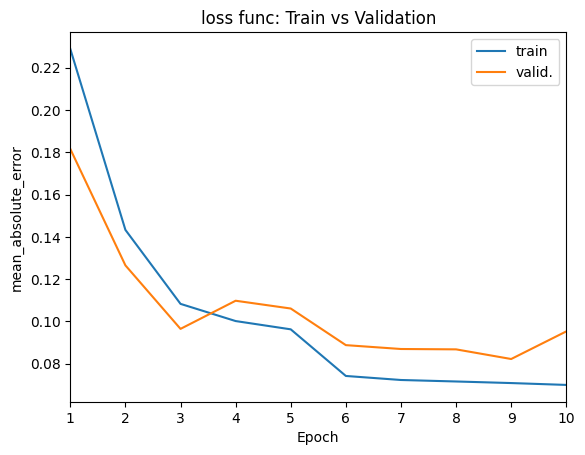

821/821 - 39s - 48ms/step - loss: 0.0111 - mean_absolute_error: 0.0700 - val_loss: 0.0197 - val_mean_absolute_error: 0.0953 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 9.
Saving model in ./models/Multiple_site_from_single_Site_model_19.keras

Training Score:
821/821 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step
mean_squared_error: 0.0113(0.1063) - mean_absolute_error: 0.0715
DeNorm_mean_squared_error: 36455.7266(190.9338) - DeNorm_mean_absolute_error: 128.6839


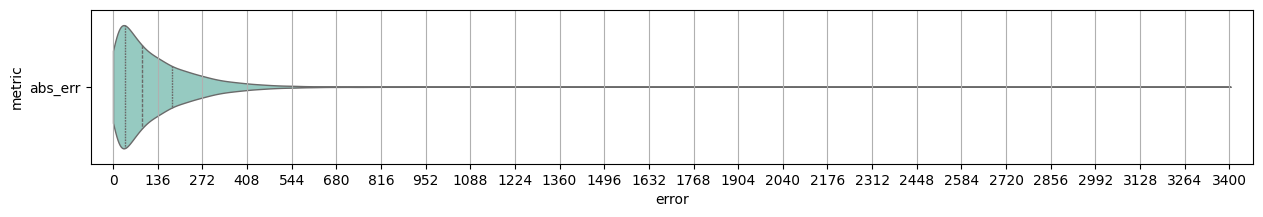

,mean,std,min,25%,50%,75%,max
error,128.683931,141.056465,0.000321,37.164344,87.937237,178.284629,3404.309649



Validation Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
mean_squared_error: 0.0157(0.1253) - mean_absolute_error: 0.0822
DeNorm_mean_squared_error: 50928.2500(225.6729) - DeNorm_mean_absolute_error: 148.0332


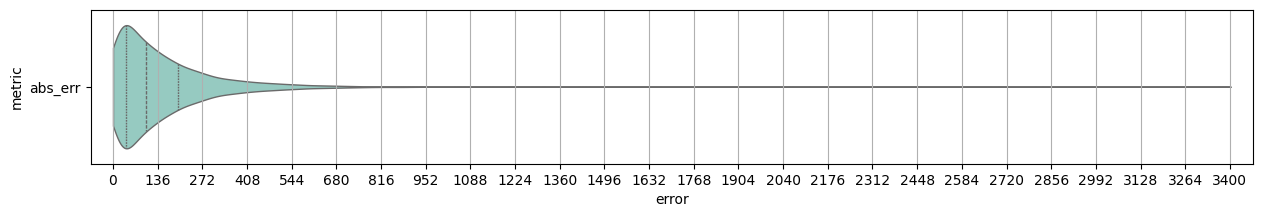

,mean,std,min,25%,50%,75%,max
error,148.03317,170.346008,0.038765,40.358937,101.079231,199.063096,3402.726746



Test Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step
mean_squared_error: 0.0206(0.1435) - mean_absolute_error: 0.0943
DeNorm_mean_squared_error: 66648.3281(258.1634) - DeNorm_mean_absolute_error: 169.7594


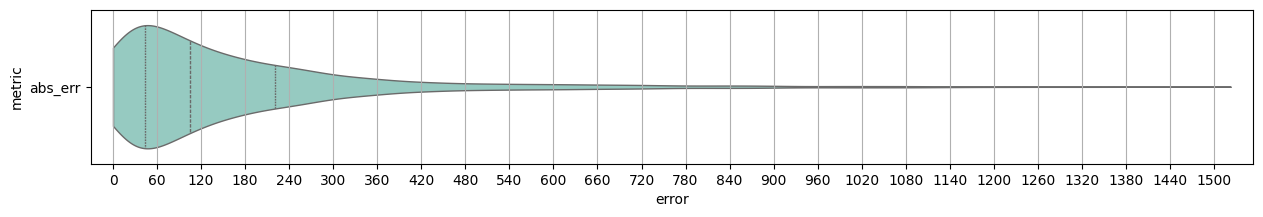

,mean,std,min,25%,50%,75%,max
error,169.759424,194.510705,0.009977,43.49504,105.529717,220.340573,1522.779372


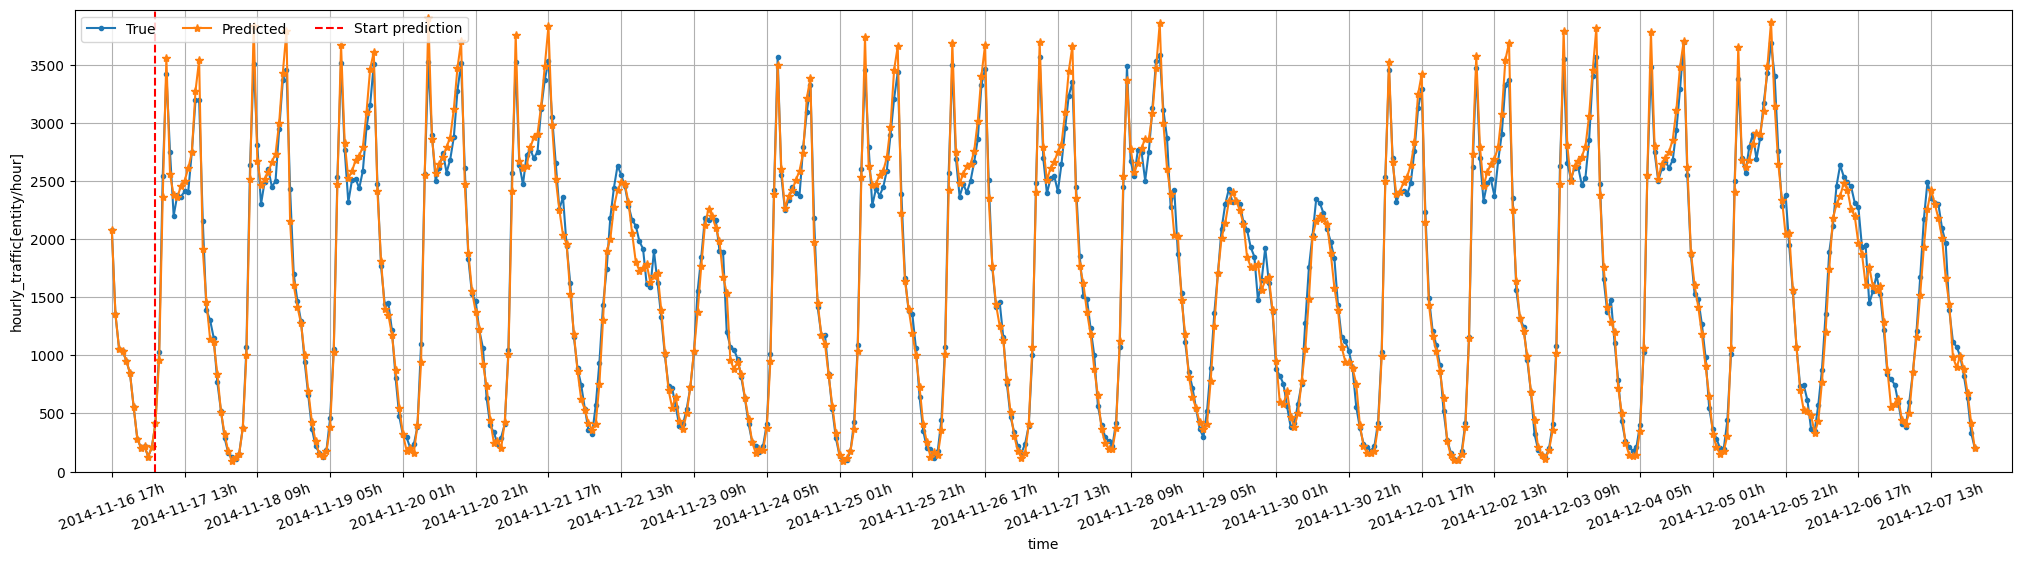


Prediction Scores:
272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step
mean_squared_error: 0.0206(0.1435) - mean_absolute_error: 0.0943
DeNorm_mean_squared_error: 66648.3281(258.1634) - DeNorm_mean_absolute_error: 169.7594


In [6]:
model_stacked_lstm_9 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(trainer.shape_X)),
    tf.keras.layers.LSTM(units=256, return_sequences=True),
    tf.keras.layers.LSTM(units=256, return_sequences=False),
    tf.keras.layers.Dense(units=64, activation="linear"),
    tf.keras.layers.Dense(units=trainer.shape_y, activation="linear")
])
model_stacked_lstm_9.name="Multiple_site_from_single_Site_model_9"
plot_model_info(model_stacked_lstm_9)

_ = trainer.fit_on(
    on_model         = model_stacked_lstm_9,
    N_epochs         = epochs,
    patience_RLR     = patience_RLR,
    patience_ES      = patience_ES,
    plot_range = plot_range,
    save_model       = sv_model,
    save_step        = sv_step,
)

### train site 11 to predict 10

In [7]:
data_set, X, Y = data.select_multiple_site([11], [10])
print(X)
print(Y)

,date,target_20,temperature_2m,apparent_temperature,relative_humidity_2m,precipitation,wind_speed_10m,cloud_cover,holiday,hour_of_day(sin),hour_of_day(cos),day_of_week(sin),day_of_week(cos),site_56
0,2010-01-01 00:00:00,0.798333,1.1770,1.222295,0.524240,0.0,0.524168,0.009,1.0,0.500000,1.000000,0.283058,0.049516,0.497778
1,2010-01-01 01:00:00,0.772222,1.2745,1.343040,0.477259,0.0,0.747476,0.000,1.0,0.629410,0.982963,0.283058,0.049516,0.477778
2,2010-01-01 02:00:00,0.632222,1.3520,1.412889,0.448419,0.0,1.099294,0.000,1.0,0.750000,0.933013,0.283058,0.049516,0.355000
3,2010-01-01 03:00:00,0.487222,1.3895,1.434875,0.437566,0.0,1.345927,0.000,1.0,0.853553,0.853553,0.283058,0.049516,0.280000
4,2010-01-01 04:00:00,0.366111,1.3995,1.424755,0.436701,0.0,1.493795,0.000,1.0,0.933013,0.750000,0.283058,0.049516,0.179444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014-12-31 19:00:00,0.734444,0.9045,0.809185,0.573908,0.0,0.819170,0.294,0.0,0.017037,0.629410,0.987464,0.388740,0.398889
43820,2014-12-31 20:00:00,0.687778,0.9270,0.825308,0.546799,0.0,0.839657,0.279,0.0,0.066987,0.750000,0.987464,0.388740,0.402222
43821,2014-12-31 21:00:00,0.954444,1.0020,0.909157,0.504800,0.0,0.783592,0.291,0.0,0.146447,0.853553,0.987464,0.388740,0.496667
43822,2014-12-31 22:00:00,1.061111,1.1495,1.102550,0.431425,0.0,0.408000,0.273,0.0,0.250000,0.933013,0.987464,0.388740,0.557778


['site_56', 'hour_of_day(sin)', 'hour_of_day(cos)', 'day_of_week(sin)', 'day_of_week(cos)', 'holiday', 'temperature_2m', 'apparent_temperature', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m', 'cloud_cover']
['target_20']


In [8]:
input_len = Trainer.NEW_X_WINDOWS

_, _, Test1 =  data.split_and_get_generators_multi(data_set,training = 2, validation = 0, test= 3, X_col=X, y_col=Y, input_size=input_len, stop=False)
Train2, Valid2, Test2 =  data.split_and_get_generators_multi(data_set,training = 2, validation = 1, test= 1, X_col=X, y_col=Y, input_size=input_len, stop=True)

In [9]:
patience_RLR = 2
patience_ES = 4
epochs = 10
plot_range = range(7673,8173)
sv_model = True
sv_step = False

trainer = Trainer(Train2, Valid2, Test2)



Training:



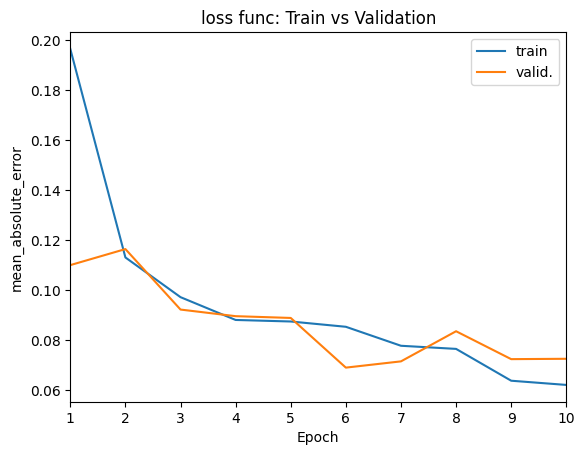


Epoch 10: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
821/821 - 42s - 51ms/step - loss: 0.0100 - mean_absolute_error: 0.0621 - val_loss: 0.0121 - val_mean_absolute_error: 0.0725 - learning_rate: 1.0000e-04
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 6.
Saving model in ./models/Multiple_site_from_single_Site_model_56.keras

Training Score:
821/821 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step
mean_squared_error: 0.0133(0.1153) - mean_absolute_error: 0.0780
DeNorm_mean_squared_error: 43193.2422(207.8298) - DeNorm_mean_absolute_error: 140.3406


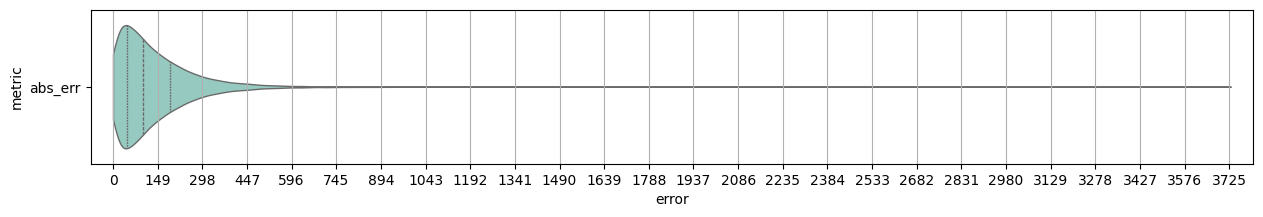

,mean,std,min,25%,50%,75%,max
error,140.340546,153.292748,0.002928,46.777697,100.902834,188.819381,3729.927464



Validation Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
mean_squared_error: 0.0107(0.1034) - mean_absolute_error: 0.0690
DeNorm_mean_squared_error: 34726.1602(186.3496) - DeNorm_mean_absolute_error: 124.2118


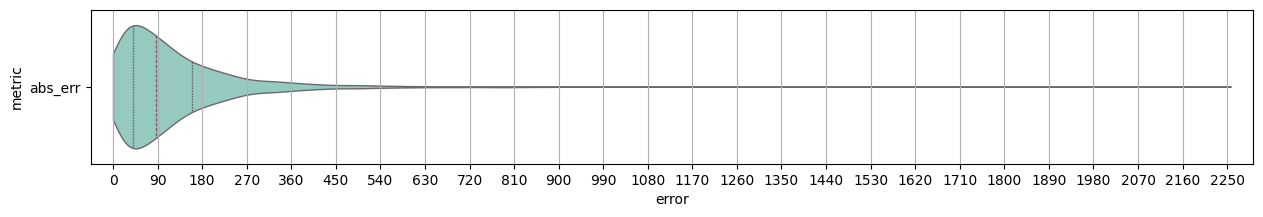

,mean,std,min,25%,50%,75%,max
error,124.211797,138.923753,0.015188,40.895152,85.869362,160.135528,2257.382727



Test Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
mean_squared_error: 0.0192(0.1386) - mean_absolute_error: 0.0991
DeNorm_mean_squared_error: 62324.4688(249.6487) - DeNorm_mean_absolute_error: 178.4590


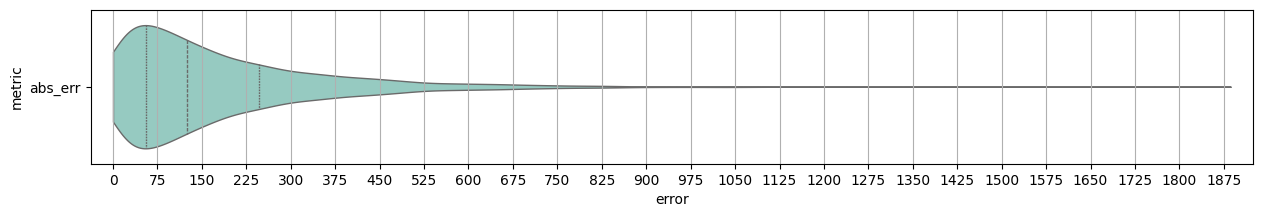

,mean,std,min,25%,50%,75%,max
error,178.458967,174.586258,0.001515,56.076061,124.530782,246.079108,1886.756605


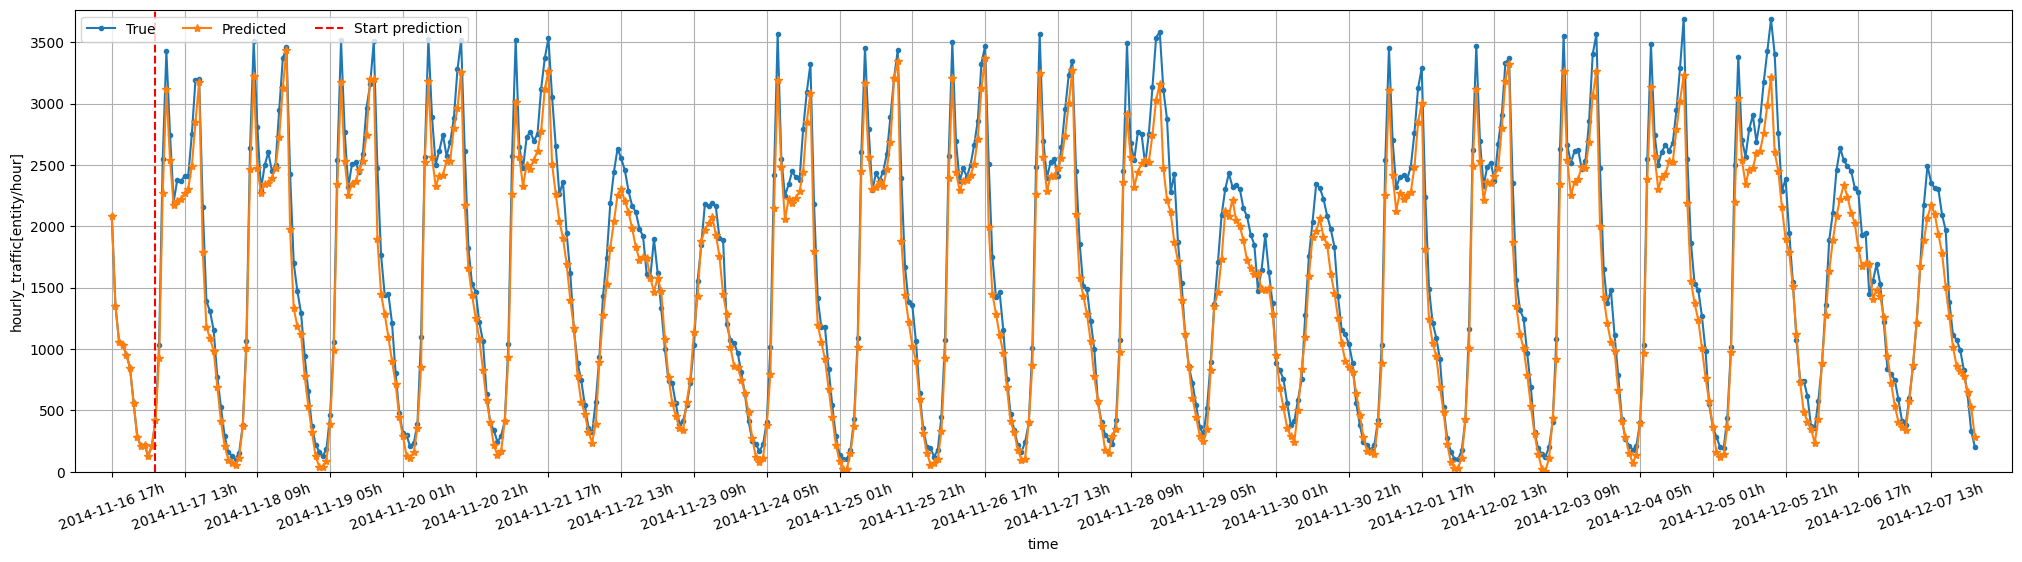


Prediction Scores:
272/272 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step
mean_squared_error: 0.0192(0.1386) - mean_absolute_error: 0.0991
DeNorm_mean_squared_error: 62324.4688(249.6487) - DeNorm_mean_absolute_error: 178.4590


In [10]:
model_stacked_lstm_11 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(trainer.shape_X)),
    tf.keras.layers.LSTM(units=256, return_sequences=True),
    tf.keras.layers.LSTM(units=256, return_sequences=False),
    tf.keras.layers.Dense(units=64, activation="linear"),
    tf.keras.layers.Dense(units=trainer.shape_y, activation="linear")
])
model_stacked_lstm_11.name="Multiple_site_from_single_Site_model_11"
plot_model_info(model_stacked_lstm_11)

_ = trainer.fit_on(
    on_model         = model_stacked_lstm_11,
    N_epochs         = epochs,
    patience_RLR     = patience_RLR,
    patience_ES      = patience_ES,
    plot_range = plot_range,
    save_model       = sv_model,
    save_step        = sv_step,
)

## Creation of the prediction dataset

### level 0 model predictions placed in vectors

In [ ]:
pred_stackedLSTM_9, _ = trainer.predict_and_compare(model_stacked_lstm_9, Test1, plot_range, do_plot = False)
pred_stackedLSTM_11, _ = trainer.predict_and_compare(model_stacked_lstm_11, Test1, plot_range, do_plot = False)

### Network input organization level 1

In [24]:
data_set, X, Y = data.select_multiple_site([10])
target = data_set[(data_set['date'] >= "2012-01-01 13:00:00")].reset_index(drop=True)
target = target[[Y[0], 'date']]
target = target[:-19]
target

In [ ]:
target['site9_10'] = pred_stackedLSTM_9
target['site11_10'] = pred_stackedLSTM_11
target.to_csv('../data/Multiple_site_from_single_result.csv', index=False)
target

#### Creation of input windows

In [ ]:
dataTrain = target[(target['date'] >= "2012-01-01 13:00:00") & (target['date'] < "2013-01-01 00:00:00")].reset_index(drop=True)
dataValid = target[(target['date'] >= "2013-01-01 13:00:00") & (target['date'] < "2014-01-01 00:00:00")].reset_index(drop=True)
dataTest = target[(target['date'] >= "2014-01-01 13:00:00")].reset_index(drop=True)
dataTrain

In [ ]:
from modules.kerasGenerator import CustomDataGen

Train2 = CustomDataGen(dataTrain, ['Stk_LSTM', 'mod_LSTM', 'GRU'], Y, 32, input_len, 1, -1)
Valid2 = CustomDataGen(dataValid, ['Stk_LSTM', 'mod_LSTM', 'GRU'], Y, 32, input_len, 1, -1)
Test2 = CustomDataGen(dataTest, ['Stk_LSTM', 'mod_LSTM', 'GRU'], Y, 32, input_len, 1, -1)

## Level 1 Model Training

In [ ]:
patience_RLR = 2
patience_ES = 5
epochs = 8
plot_range = range(7673,8173)
sv_model = False
sv_step = False

trainer = Trainer(Train2, Valid2, Test2)

### Generalization network/meta model: Stacked LSTM



Training:



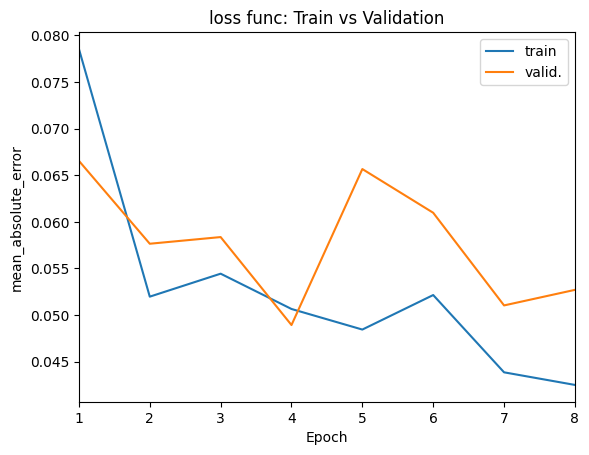


Epoch 8: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
273/273 - 13s - 48ms/step - loss: 0.0037 - mean_absolute_error: 0.0425 - val_loss: 0.0057 - val_mean_absolute_error: 0.0527 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 4.

Training Score:
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
mean_squared_error: 0.0040(0.0632) - mean_absolute_error: 0.0442
DeNorm_mean_squared_error: 13057.0391(114.2674) - DeNorm_mean_absolute_error: 79.5806


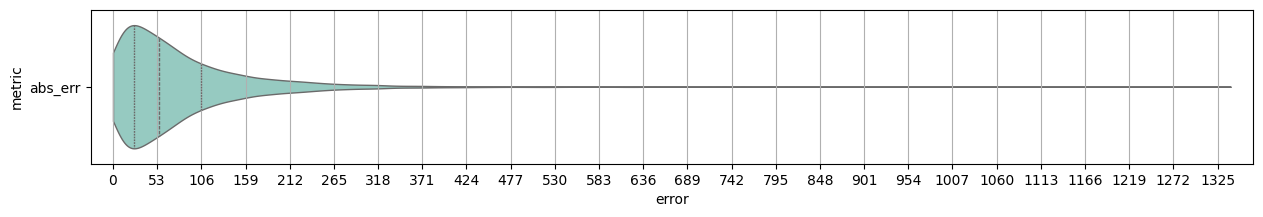

,mean,std,min,25%,50%,75%,max
error,79.580557,82.004536,0.038454,25.018259,55.756273,105.919559,1340.875133



Validation Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
mean_squared_error: 0.0053(0.0728) - mean_absolute_error: 0.0489
DeNorm_mean_squared_error: 17206.0312(131.1718) - DeNorm_mean_absolute_error: 88.0620


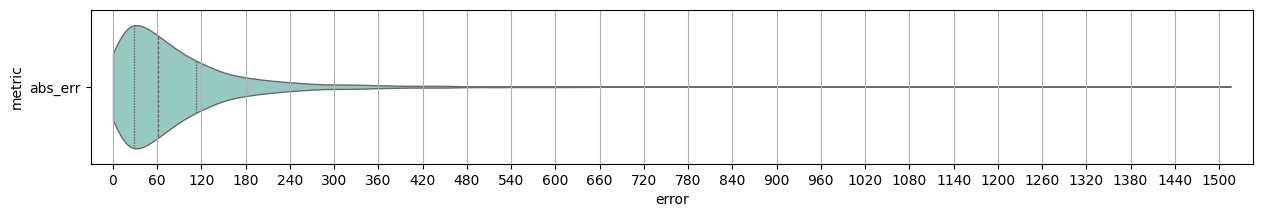

,mean,std,min,25%,50%,75%,max
error,88.061962,97.222464,0.014661,28.804553,60.821838,112.452094,1515.958539



Test Score:
271/271 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
mean_squared_error: 0.0092(0.0959) - mean_absolute_error: 0.0674
DeNorm_mean_squared_error: 29917.3574(172.9664) - DeNorm_mean_absolute_error: 121.3070


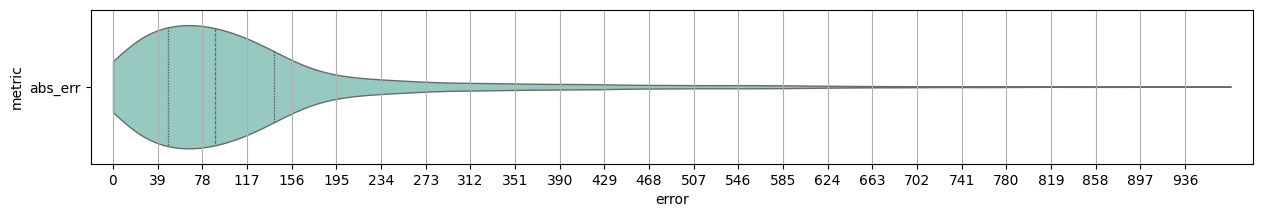

,mean,std,min,25%,50%,75%,max
error,121.307013,123.303349,0.024351,48.155541,89.029263,140.78984,975.963468


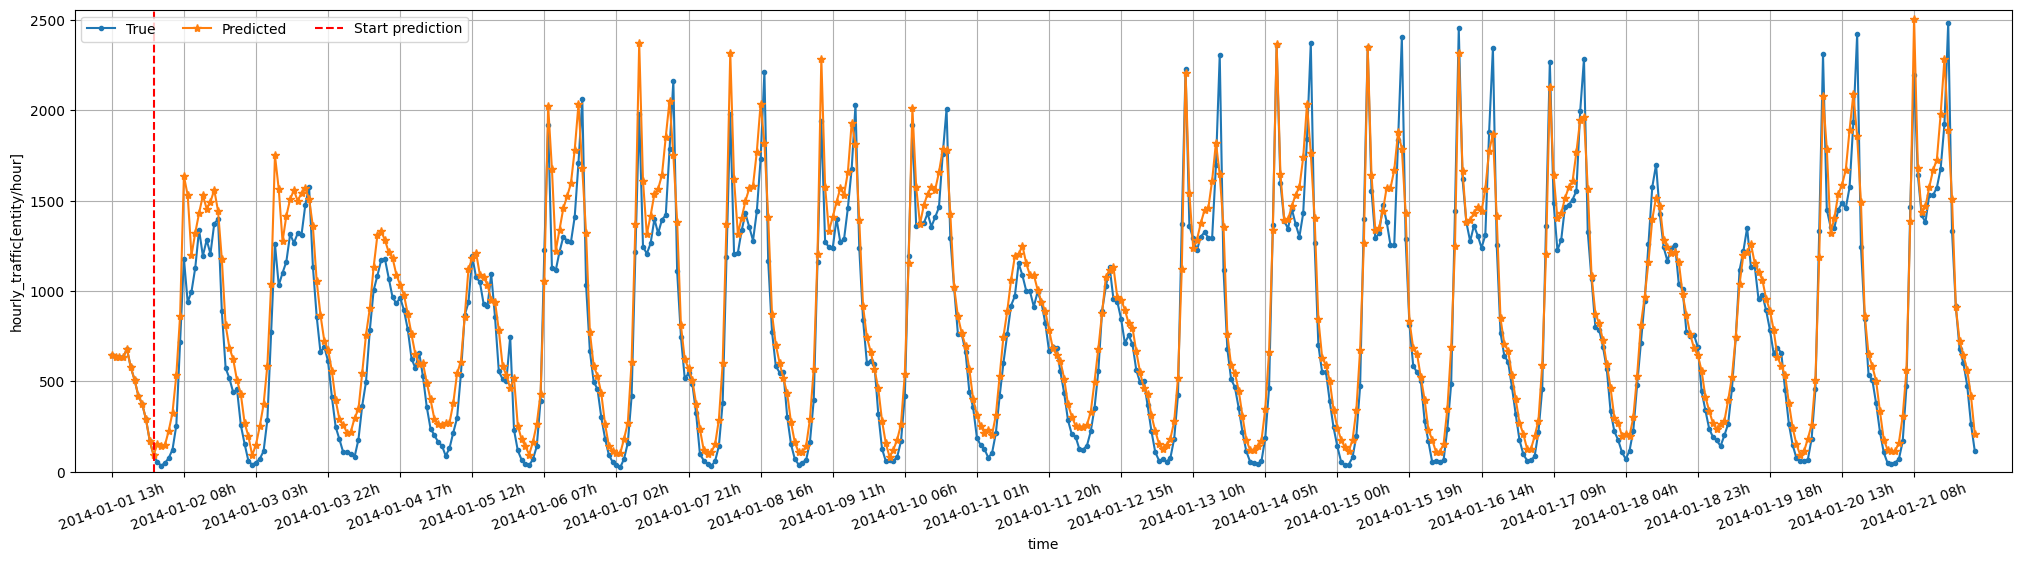

In [ ]:
meta_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(trainer.shape_X)),
    tf.keras.layers.LSTM(units=256, return_sequences=True),
    tf.keras.layers.LSTM(units=256, return_sequences=False),
    tf.keras.layers.Dense(units=64, activation="linear"),
    tf.keras.layers.Dense(units=trainer.shape_y, activation="linear")
])
meta_model.name="meta_model"
plot_model_info(meta_model)

_ = trainer.fit_on(
    on_model         = meta_model,
    N_epochs         = epochs,
    patience_RLR     = patience_RLR,
    patience_ES      = patience_ES,
    #plot_range       = plot_range,
    save_model       = sv_model,
    save_step        = sv_step,
)